In [859]:
import pandas as pd
file = pd.read_csv('../data/cleaned_complete.csv').drop(['Unnamed: 0','Unnamed: 0.1','index','dateUpdated','dateListed','geoLocation','geometry', 'index_right', 'SA2_maincode_2021','Population Increase','Earners (persons)','Median age of earners (years)','Male','Female',	'Person','Male Ratio','Female Ratio','Sum ($)','Mean ($)','Median ($)','propertyTypes','surburb','price'],axis = 1)

In [860]:
median_price = file.groupby(['bathrooms', 'bedrooms', 'carspaces','year','postcode'],as_index = False)['rent'].median('rent')
median_rent = dict()
for index, values in median_price.iterrows():
    year = values['year']
    bathrooms = values['bathrooms']
    bedrooms = values['bedrooms']
    carspaces = values['carspaces']
    postcode = values['postcode']
    key = postcode+year+bathrooms+bedrooms+carspaces
    median_rent[key] = values['rent']
values_list = []
for item,values in file.iterrows():
    year = values['year']
    bathrooms = values['bathrooms']
    bedrooms = values['bedrooms']
    carspaces = values['carspaces']
    postcode = values['postcode']
    key = postcode+year+bathrooms+bedrooms+carspaces
    hit = median_rent[key]
    values_list.append(hit)


In [861]:
file['median_rent'] = values_list 
file = file[file['rent'] <= 1.5 * file['median_rent']]
file

,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,year,month,bond,rent,longitude,...,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,median_rent
0,1.0,1.0,0.0,NaN,3205,2019,1,NaN,360.0,144.960873,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,790.0
1,2.0,2.0,1.0,NaN,3205,2019,1,NaN,725.0,144.964862,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,565.0
2,1.0,2.0,0.0,NaN,3205,2019,1,NaN,500.0,144.960818,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,570.0
3,1.0,3.0,0.0,NaN,3205,2019,1,NaN,795.0,144.953039,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,580.0
4,2.0,2.0,0.0,NaN,3205,2019,1,NaN,825.0,144.949687,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100634,1.0,3.0,1.0,NaN,3701,2022,5,NaN,280.0,147.493795,...,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,500.0
100635,1.0,3.0,1.0,NaN,3701,2022,6,NaN,290.0,147.494529,...,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,500.0
100636,1.0,3.0,2.0,NaN,3700,2022,8,NaN,470.0,147.258393,...,NaN,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6181.185987,500.0
100637,1.0,3.0,2.0,NaN,3700,2021,3,NaN,310.0,147.177222,...,NaN,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6153.000000,490.0


In [863]:
postcode_count = pd.DataFrame(file['postcode'].value_counts()).reset_index().rename({"index":"postcode",'postcode':'count'},axis = 1)
postcode_count

,postcode,count
0,3000,8652
1,3008,4253
2,3006,3066
3,3029,2823
4,3141,2552
...,...,...
461,3890,1
462,3453,1
463,3221,1
464,3870,1


In [864]:
file

,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,year,month,bond,rent,longitude,...,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,median_rent
0,1.0,1.0,0.0,NaN,3205,2019,1,NaN,360.0,144.960873,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,790.0
1,2.0,2.0,1.0,NaN,3205,2019,1,NaN,725.0,144.964862,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,565.0
2,1.0,2.0,0.0,NaN,3205,2019,1,NaN,500.0,144.960818,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,570.0
3,1.0,3.0,0.0,NaN,3205,2019,1,NaN,795.0,144.953039,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,580.0
4,2.0,2.0,0.0,NaN,3205,2019,1,NaN,825.0,144.949687,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100634,1.0,3.0,1.0,NaN,3701,2022,5,NaN,280.0,147.493795,...,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,500.0
100635,1.0,3.0,1.0,NaN,3701,2022,6,NaN,290.0,147.494529,...,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,500.0
100636,1.0,3.0,2.0,NaN,3700,2022,8,NaN,470.0,147.258393,...,NaN,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6181.185987,500.0
100637,1.0,3.0,2.0,NaN,3700,2021,3,NaN,310.0,147.177222,...,NaN,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6153.000000,490.0


In [865]:
df = file.groupby(['bathrooms','bedrooms','carspaces','postcode','year','month'],as_index= False).median(['rent','distance of the closest bus stop','distance of the closest train stop','distance of the closest tram stop','distance of the closest vline stop','distance of the closest school','distance to the closest shopping mall',]).drop(['landAreaSqm','longitude', 'latitude','median_rent','bond'],axis = 1)
df

,bathrooms,bedrooms,carspaces,postcode,year,month,rent,distance of the closest bus stop,count of bus stop,distance of the closest train stop,...,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population
0,0.0,1.0,0.0,3008,2019,12,850.0,0.456268,5.0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0,16375.000000
1,0.0,1.0,0.0,3015,2019,10,250.0,0.370457,60.0,0.405244,...,14.0,19.0,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0,19243.000000
2,0.0,1.0,0.0,3053,2022,5,175.0,0.449442,39.0,NaN,...,4.0,6.0,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0,16701.220181
3,0.0,1.0,0.0,3079,2022,3,300.0,0.516233,48.0,0.526467,...,3.0,3.0,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0,12678.988491
4,0.0,1.0,0.0,3171,2020,2,460.0,0.642444,64.0,0.670534,...,1.0,1.0,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0,23636.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44166,4.0,5.0,4.0,3064,2021,11,540.0,0.386602,209.0,0.457571,...,11.0,24.0,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0,22005.000000
44167,4.0,5.0,4.0,3133,2020,10,900.0,0.642555,64.0,NaN,...,1.0,1.0,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0,11324.000000
44168,4.0,5.0,4.0,3335,2022,6,650.0,0.129284,10.0,NaN,...,1.0,4.0,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0,25309.447163
44169,4.0,5.0,4.0,3844,2019,8,570.0,1.741227,124.0,NaN,...,0.0,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0,16489.000000


In [866]:
df = df.join(postcode_count, on = 'postcode', how = 'left', lsuffix= 'l_',rsuffix= 'r_')

In [717]:
# df = file.groupby(['bathrooms','bedrooms','carspaces','postcode','year','month'],as_index= False).median('rent')[['Population ','bond','distance of the closest bus stop',
#        'count of bus stop', 'distance of the closest train stop',
#        'count of train stop', 'distance of the closest tram stop',
#        'count of tram stop', 'distance of the closest vline stop',
#        'count of vline stop', 'distance of the closest school',
#        'count of school', 'count of hospital',
#        'distance to the closest shopping mall', 'count of shopping mall',
#        'bench', 'cafe', 'childcare', 'fast_food', 'kindergarten', 'parking',
#        'restaurant', 'place_of_worship', 'school', 'university', 'garden',
#        'park', 'playground', 'pitch', 'offence count', 'incidents recorded']]

In [730]:
data_list = []
for name, group in file.groupby(['postcode','year','month'],as_index = False):
    rent_median = group['rent'].median()
    bus_count = group['count of bus stop'].mean()
    train_count = group['count of train stop'].mean()
    tram_count = group['count of tram stop'].mean()
    vline_count = group['count of vline stop'].mean()
    school_count = group['count of school'].mean()
    bench_count = group['bench'].mean()
    cafe_count = group['cafe'].mean()
    child_care_count = group['childcare'].mean()
    fast_food_count = group['fast_food'].mean()
    kindergarten_count = group['kindergarten'].mean()
    parking_count = group['parking'].mean()
    restaurant_count = group['restaurant'].mean()
    school_count = group['school'].mean()
    university_count = group['university'].mean()
    park_count = group['park'].mean()
    playground_count = group['playground'].mean()
    pitch_count = group['pitch'].mean()
    garden_count = group['garden'].mean()
    offence_count = group['offence count'].mean()
    incidents_recorded_count = group[ 'incidents recorded'].mean()
    shopping_mall_count = group['count of shopping mall'].mean()
    bus_distance = group['distance of the closest bus stop'].mean()
    train_distance  = group['distance of the closest train stop'].mean()
    vline_distance  = group['distance of the closest vline stop'].mean()
    tram_distance  = group['distance of the closest tram stop'].mean()
    mall_distance  = group['distance to the closest shopping mall'].mean()
    school_distance  = group['distance of the closest school'].mean()
    data_list.append((name[0],name[1],name[2],bus_count,train_count,tram_count,vline_count,school_count,bench_count,cafe_count,child_care_count,fast_food_count,kindergarten_count
    ,parking_count,restaurant_count,school_count,university_count,park_count,playground_count,pitch_count,garden_count,offence_count,
    incidents_recorded_count,shopping_mall_count,bus_distance,train_distance,vline_distance,tram_distance,mall_distance, school_distance,rent_median))

In [731]:
data_df = pd.DataFrame(data_list,columns=['postcode','year','month','bus_count','train_count','tram_count','vline_count','school_count','bench_count','cafe_count', 'child_care_count', 'fast_food_count', 'kindergarten_count'
    ,'parking_count','restaurant_count','school_count','university_count','park_count','playground_count','pitch_count','garden_count','offence_count',
    'incidents_recorded_count','shopping_mall_count',
    'bus_distance','train_distance','vline_distance','tram_distance','mall_distance', 'school_distance','rent_median'])

In [733]:
population = pd.read_csv('../data/population_forcasting.csv')

In [734]:
population_count = dict()
population['Postcode'] = population['Postcode'].fillna(value=0)
for index, value in population.iterrows():
    postcode = int(value['Postcode'])
    year = value['year']
    key = str(postcode)+ ' ' + str(year)
    population_count[key] = value['Total']

In [735]:
population_list = []
for index, value in data_df.iterrows():
    postcode = int(value['postcode'])
    year = value['year']
    key = str(postcode)+ ' ' + str(year)
    try: 
        count = population_count[key]
        population_list.append(count)
    except:
        population_list.append(None)
data_df['population'] = population_list

In [736]:
data_df

,postcode,year,month,bus_count,train_count,tram_count,vline_count,school_count,bench_count,cafe_count,...,incidents_recorded_count,shopping_mall_count,bus_distance,train_distance,vline_distance,tram_distance,mall_distance,school_distance,rent_median,population
0,3000,2019,1,19.0,0.0,23.0,1.0,3.0,31.0,20.0,...,125561.0,26.0,0.448337,NaN,0.445931,0.447078,0.261973,0.446642,570.0,None
1,3000,2019,2,19.0,0.0,23.0,1.0,3.0,31.0,20.0,...,125561.0,26.0,0.448631,NaN,0.446229,0.447383,0.261937,0.446969,540.0,None
2,3000,2019,3,19.0,0.0,23.0,1.0,3.0,31.0,20.0,...,125561.0,26.0,0.449119,NaN,0.446720,0.447878,0.262212,0.447478,520.0,None
3,3000,2019,4,19.0,0.0,23.0,1.0,3.0,31.0,20.0,...,125561.0,26.0,0.448244,NaN,0.445839,0.446987,0.261852,0.446554,550.0,None
4,3000,2019,5,19.0,0.0,23.0,1.0,3.0,31.0,20.0,...,125561.0,26.0,0.447546,NaN,0.445147,0.446307,0.260652,0.445910,530.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,3984,2019,6,18.0,0.0,0.0,8.0,3.0,5.0,1.0,...,3058.0,0.0,1.050011,NaN,1.034391,NaN,NaN,1.041315,600.0,None
11187,3984,2019,9,18.0,0.0,0.0,8.0,3.0,5.0,1.0,...,3058.0,0.0,1.061120,NaN,1.045534,NaN,NaN,1.052462,290.0,None
11188,3984,2021,2,18.0,0.0,0.0,8.0,3.0,5.0,1.0,...,3058.0,0.0,0.999686,NaN,1.026205,NaN,NaN,1.033668,400.0,None
11189,3984,2021,4,18.0,0.0,0.0,8.0,3.0,5.0,1.0,...,3058.0,0.0,1.075916,NaN,1.059396,NaN,NaN,1.066311,360.0,None


In [823]:
cpi_combined_df = pd.read_csv('../data/cpi_df.csv')
cpi_combined_df = cpi_combined_df.set_index(['month','year'])
cpi_combined_df 

,,Consumer_price_index
month,year,
8,2018,1.9
9,2018,1.9
10,2018,1.9
11,2018,1.8
12,2018,1.8
...,...,...
8,2024,3.5
9,2024,3.5
10,2024,3.0


In [853]:
df

,bathrooms,bedrooms,carspaces,postcodel_,year,month,bond,rent,distance of the closest bus stop,count of bus stop,...,university,garden,park,playground,pitch,offence count,incidents recorded,Population,postcoder_,count
0,0.0,1.0,0.0,3008,2019,12,5100.0,850.0,0.456268,5.0,...,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0,16375.000000,NaN,NaN
1,0.0,1.0,0.0,3015,2019,10,1084.0,250.0,0.370457,60.0,...,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0,19243.000000,NaN,NaN
2,0.0,1.0,0.0,3053,2022,5,0.0,175.0,0.449442,39.0,...,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0,16701.220181,NaN,NaN
3,0.0,1.0,0.0,3079,2022,3,1304.0,300.0,0.516233,48.0,...,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0,12678.988491,NaN,NaN
4,0.0,1.0,0.0,3171,2020,2,5000.0,460.0,0.642444,64.0,...,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0,23636.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44166,4.0,5.0,4.0,3064,2021,11,2340.0,540.0,0.386602,209.0,...,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0,22005.000000,NaN,NaN
44167,4.0,5.0,4.0,3133,2020,10,NaN,900.0,0.642555,64.0,...,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0,11324.000000,NaN,NaN
44168,4.0,5.0,4.0,3335,2022,6,2824.0,650.0,0.129284,10.0,...,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0,25309.447163,NaN,NaN
44169,4.0,5.0,4.0,3844,2019,8,NaN,570.0,1.741227,124.0,...,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0,16489.000000,NaN,NaN


In [867]:
#个数不同
merged = df.join(cpi_combined_df, on = ['month','year'], how = 'left')
merged

,bathrooms,bedrooms,carspaces,postcodel_,year,month,rent,distance of the closest bus stop,count of bus stop,distance of the closest train stop,...,garden,park,playground,pitch,offence count,incidents recorded,Population,postcoder_,count,Consumer_price_index
0,0.0,1.0,0.0,3008,2019,12,850.0,0.456268,5.0,NaN,...,0.0,1.0,0.0,0.0,25125.0,18185.0,16375.000000,NaN,NaN,1.8
1,0.0,1.0,0.0,3015,2019,10,250.0,0.370457,60.0,0.405244,...,10.0,67.0,26.0,40.0,10604.0,8777.0,19243.000000,NaN,NaN,1.7
2,0.0,1.0,0.0,3053,2022,5,175.0,0.449442,39.0,NaN,...,8.0,19.0,8.0,24.0,20238.0,15867.0,16701.220181,NaN,NaN,6.1
3,0.0,1.0,0.0,3079,2022,3,300.0,0.516233,48.0,0.526467,...,0.0,20.0,14.0,42.0,9248.0,7527.0,12678.988491,NaN,NaN,5.1
4,0.0,1.0,0.0,3171,2020,2,460.0,0.642444,64.0,0.670534,...,0.0,5.0,4.0,12.0,22113.0,16777.0,23636.000000,NaN,NaN,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44166,4.0,5.0,4.0,3064,2021,11,540.0,0.386602,209.0,0.457571,...,77.0,119.0,48.0,190.0,55237.0,41689.0,22005.000000,NaN,NaN,3.5
44167,4.0,5.0,4.0,3133,2020,10,900.0,0.642555,64.0,NaN,...,0.0,4.0,0.0,2.0,7751.0,5998.0,11324.000000,NaN,NaN,0.7
44168,4.0,5.0,4.0,3335,2022,6,650.0,0.129284,10.0,NaN,...,140.0,48.0,30.0,56.0,4762.0,3843.0,25309.447163,NaN,NaN,6.1
44169,4.0,5.0,4.0,3844,2019,8,570.0,1.741227,124.0,NaN,...,0.0,4.0,3.0,3.0,42754.0,29717.0,16489.000000,NaN,NaN,1.7


In [738]:
#个数不同
merged_data = data_df.join(cpi_combined_df, on = ['month','year'],how = 'left').reset_index()
merged_data = pd.merge(merged_data,postcode_count,left_on='postcode',right_on = 'postcode', how = 'left').rename({'count':'house_count'},axis = 1)

In [641]:
merged_data

,index,postcode,year,month,bus_count,train_count,tram_count,vline_count,school_count,bench_count,...,bus_distance,train_distance,vline_distance,tram_distance,mall_distance,school_distance,rent_median,population,Consumer_price_index,house_count
0,0,3000,2019,1,19.0,0.0,23.0,1.0,3.0,31.0,...,0.448438,NaN,0.446033,0.447180,0.262038,0.446747,570.0,8294.0,1.8,8962
1,1,3000,2019,2,19.0,0.0,23.0,1.0,3.0,31.0,...,0.448711,NaN,0.446309,0.447463,0.261997,0.447051,540.0,8294.0,1.3,8962
2,2,3000,2019,3,19.0,0.0,23.0,1.0,3.0,31.0,...,0.449038,NaN,0.446639,0.447797,0.262132,0.447398,530.0,8294.0,1.3,8962
3,3,3000,2019,4,19.0,0.0,23.0,1.0,3.0,31.0,...,0.448129,NaN,0.445724,0.446872,0.261735,0.446440,550.0,8294.0,1.3,8962
4,4,3000,2019,5,19.0,0.0,23.0,1.0,3.0,31.0,...,0.447490,NaN,0.445091,0.446250,0.260625,0.445851,540.0,8294.0,1.6,8962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11524,11262,3984,2019,9,18.0,0.0,0.0,8.0,3.0,5.0,...,1.061120,NaN,1.045534,NaN,NaN,1.052462,290.0,NaN,1.7,7
11525,11263,3984,2021,2,18.0,0.0,0.0,8.0,3.0,5.0,...,0.999686,NaN,1.026205,NaN,NaN,1.033668,400.0,NaN,1.1,7
11526,11264,3984,2021,4,18.0,0.0,0.0,8.0,3.0,5.0,...,1.075916,NaN,1.059396,NaN,NaN,1.066311,360.0,NaN,1.1,7
11527,11265,3984,2022,7,18.0,0.0,0.0,8.0,3.0,5.0,...,0.999722,NaN,1.026319,NaN,NaN,1.033783,520.0,NaN,6.1,7


In [739]:
merged_data = merged_data.fillna(0)

In [868]:
merged = merged.fillna(0)

In [847]:
merged

,bathrooms,bedrooms,carspaces,postcodel_,year,month,bond,rent,distance of the closest bus stop,count of bus stop,...,garden,park,playground,pitch,offence count,incidents recorded,Population,postcoder_,count,Consumer_price_index
0,0.0,1.0,0.0,3008,2019,12,5100.0,850.0,0.456268,5.0,...,0.0,1.0,0.0,0.0,25125.0,18185.0,16375.000000,0.0,0.0,1.8
1,0.0,1.0,0.0,3015,2019,10,1084.0,250.0,0.370457,60.0,...,10.0,67.0,26.0,40.0,10604.0,8777.0,19243.000000,0.0,0.0,1.7
2,0.0,1.0,0.0,3053,2022,5,0.0,175.0,0.449442,39.0,...,8.0,19.0,8.0,24.0,20238.0,15867.0,16701.220181,0.0,0.0,6.1
3,0.0,1.0,0.0,3079,2022,3,1304.0,300.0,0.516233,48.0,...,0.0,20.0,14.0,42.0,9248.0,7527.0,12678.988491,0.0,0.0,5.1
4,0.0,1.0,0.0,3171,2020,2,5000.0,460.0,0.642444,64.0,...,0.0,5.0,4.0,12.0,22113.0,16777.0,23636.000000,0.0,0.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44166,4.0,5.0,4.0,3064,2021,11,2340.0,540.0,0.386602,209.0,...,77.0,119.0,48.0,190.0,55237.0,41689.0,22005.000000,0.0,0.0,3.5
44167,4.0,5.0,4.0,3133,2020,10,0.0,900.0,0.642555,64.0,...,0.0,4.0,0.0,2.0,7751.0,5998.0,11324.000000,0.0,0.0,0.7
44168,4.0,5.0,4.0,3335,2022,6,2824.0,650.0,0.129284,10.0,...,140.0,48.0,30.0,56.0,4762.0,3843.0,25309.447163,0.0,0.0,6.1
44169,4.0,5.0,4.0,3844,2019,8,0.0,570.0,1.741227,124.0,...,0.0,4.0,3.0,3.0,42754.0,29717.0,16489.000000,0.0,0.0,1.7


In [869]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
X = merged.drop('rent',axis=1)
y = merged['rent']

In [870]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [874]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [875]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(max_iter=500).fit(X_train_std, y_train)
regr.score(X_test_std, y_test)

/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7851784001192119

In [876]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100)  
rfc = rfc.fit(X_train_std, y_train)
rfc.score(X_test_std, y_test)

0.8127268350170092

In [858]:
future_df = merged[['bathrooms','bedrooms',	'carspaces','postcodel_','distance of the closest bus stop', 'count of bus stop',
       'distance of the closest train stop', 'count of train stop',
       'distance of the closest tram stop', 'count of tram stop',
       'distance of the closest vline stop', 'count of vline stop',
       'distance of the closest school', 'count of school',
       'count of hospital', 'distance to the closest shopping mall',
       'count of shopping mall', 'bench', 'cafe', 'childcare', 'fast_food',
       'kindergarten', 'parking', 'restaurant', 'place_of_worship', 'school',
       'university', 'garden', 'park', 'playground', 'pitch', 'offence count',
       'incidents recorded','count']]
future_df

,bathrooms,bedrooms,carspaces,postcodel_,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,...,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,count
0,0.0,1.0,0.0,3008,0.456268,5.0,0.000000,0.0,0.433269,15.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0,0.0
1,0.0,1.0,0.0,3015,0.370457,60.0,0.405244,2.0,0.000000,0.0,...,14.0,19.0,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0,0.0
2,0.0,1.0,0.0,3053,0.449442,39.0,0.000000,0.0,0.452666,20.0,...,4.0,6.0,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0,0.0
3,0.0,1.0,0.0,3079,0.516233,48.0,0.526467,2.0,0.000000,0.0,...,3.0,3.0,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0,0.0
4,0.0,1.0,0.0,3171,0.642444,64.0,0.670534,2.0,0.000000,0.0,...,1.0,1.0,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44166,4.0,5.0,4.0,3064,0.386602,209.0,0.457571,2.0,0.000000,0.0,...,11.0,24.0,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0,0.0
44167,4.0,5.0,4.0,3133,0.642555,64.0,0.000000,0.0,0.645158,3.0,...,1.0,1.0,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0,0.0
44168,4.0,5.0,4.0,3335,0.129284,10.0,0.000000,0.0,0.000000,0.0,...,1.0,4.0,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0,0.0
44169,4.0,5.0,4.0,3844,1.741227,124.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0,0.0


In [ ]:
future_df = 

In [877]:
xgbc = xgb.XGBRegressor(
    learning_rate = 0.1,
    n_estimators = 20,
    seed = 27,
    verbosity = 1
)
xgbc.fit(
    X_train, 
    y_train, 
    eval_set = [(X_train, y_train), (X_test, y_test)]
)
fea_imp = xgbc.feature_importances_
print(fea_imp)


[0]	validation_0-rmse:450.34867	validation_1-rmse:450.09901
[1]	validation_0-rmse:407.41180	validation_1-rmse:407.14108
[2]	validation_0-rmse:368.93755	validation_1-rmse:368.64955
[3]	validation_0-rmse:334.35807	validation_1-rmse:334.10719
[4]	validation_0-rmse:303.45314	validation_1-rmse:303.17396
[5]	validation_0-rmse:275.83949	validation_1-rmse:275.53269
[6]	validation_0-rmse:251.11043	validation_1-rmse:250.86647
[7]	validation_0-rmse:229.18546	validation_1-rmse:228.94831
[8]	validation_0-rmse:209.45944	validation_1-rmse:209.26749
[9]	validation_0-rmse:191.94560	validation_1-rmse:191.80372
[10]	validation_0-rmse:176.39928	validation_1-rmse:176.32303
[11]	validation_0-rmse:162.71788	validation_1-rmse:162.69472
[12]	validation_0-rmse:150.59641	validation_1-rmse:150.62594
[13]	validation_0-rmse:139.97031	validation_1-rmse:140.02988
[14]	validation_0-rmse:130.69924	validation_1-rmse:130.83791
[15]	validation_0-rmse:122.53005	validation_1-rmse:122.81953
[16]	validation_0-rmse:115.18470	v

In [808]:
import numpy as np
predicted_result = np.array(xgbc.predict(X_test))
gap = pd.DataFrame(predicted_result - np.array(y_test),columns = ['gap_values'])
gap_absoulte = gap['gap_values'].apply(get_absolute).sort_values(ascending = False)

In [809]:
gap_absoulte = gap['gap_values'].apply(get_absolute).sort_values(ascending = False)

In [810]:
gap_absoulte

12667    684.764069
8314     682.152863
6957     682.152863
2068     673.989807
7671     673.864014
            ...    
4729       0.158661
6959       0.135132
5803       0.135132
3895       0.035187
9156       0.035187
Name: gap_values, Length: 14012, dtype: float64

<Axes:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

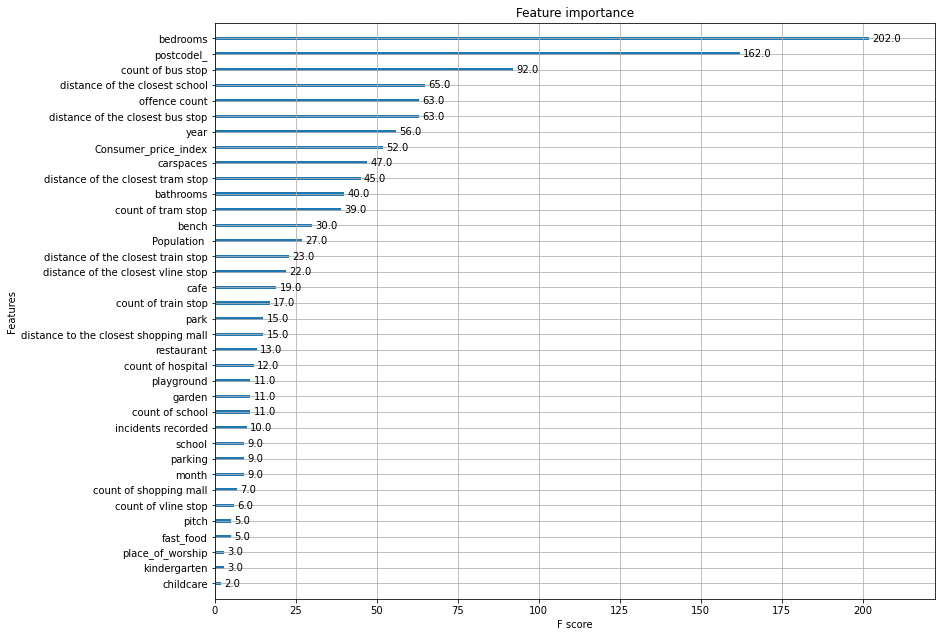

In [878]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 8))
ax = fig.add_axes([0,0,1,1])
xgb.plot_importance(xgbc, ax)